<a href="https://colab.research.google.com/github/anioki/ML_training_projects/blob/main/mashrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mushroom/mushrooms.csv', encoding="ISO-8859-1")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


#Data Observation and Preprocessing

In [4]:
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [5]:
for f in df.columns:
  print(f, pd.Series(df[f]).unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [7]:
for f in df.columns:
  print(f, pd.Series(df[f]).unique())

class [1 0]
cap-shape [5 0 4 2 3 1]
cap-surface [2 3 0 1]
cap-color [4 9 8 3 2 5 0 7 1 6]
bruises [1 0]
odor [6 0 3 5 2 1 8 7 4]
gill-attachment [1 0]
gill-spacing [0 1]
gill-size [1 0]
gill-color [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape [0 1]
stalk-root [3 2 1 4 0]
stalk-surface-above-ring [2 0 1 3]
stalk-surface-below-ring [2 0 3 1]
stalk-color-above-ring [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring [7 6 3 0 4 2 8 5 1]
veil-type [0]
veil-color [2 0 1 3]
ring-number [1 2 0]
ring-type [4 0 2 1 3]
spore-print-color [2 3 6 1 7 5 4 8 0]
population [3 2 0 4 5 1]
habitat [5 1 3 0 4 6 2]


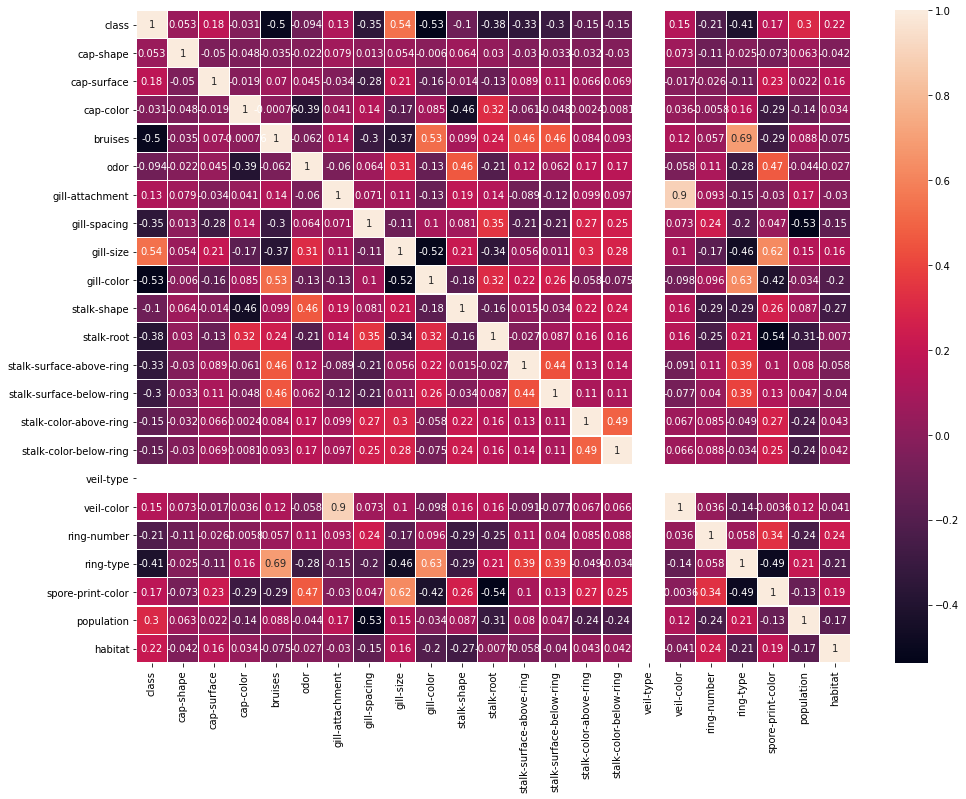

In [8]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True,linewidths=0.25,vmax=1.0,)
plt.show()

In [9]:
df.drop(['veil-type'], axis = 1, inplace = True)

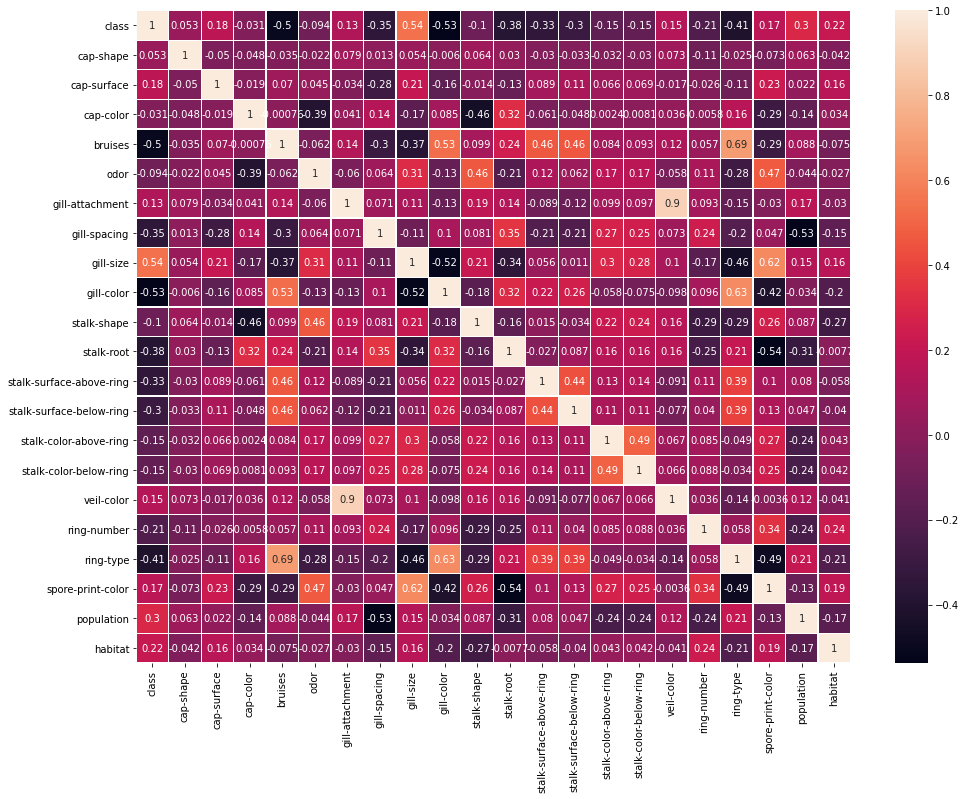

In [10]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True,linewidths=0.25,vmax=1.0,)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)
train_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5788,1,2,2,0,1,5,1,0,0,10,0,1,2,2,7,7,2,2,4,5,4,1
414,1,5,3,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,4,1
1011,0,5,2,8,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,2,3,1
7958,0,3,0,8,0,5,1,1,0,2,0,0,2,2,7,7,2,2,4,7,2,1
2664,0,5,0,3,1,5,1,0,0,7,1,1,2,2,6,7,2,1,4,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,1,3,3,4,0,8,1,0,1,0,1,0,2,2,7,7,2,1,0,7,4,4
1667,1,5,2,8,1,6,1,0,1,10,0,3,2,2,7,7,2,1,4,2,3,5
3321,0,2,0,4,1,5,1,0,0,10,1,1,2,2,7,6,2,1,4,2,4,0
1688,0,5,3,4,1,5,1,0,0,7,1,1,2,2,3,7,2,1,4,3,5,0


In [12]:
df.drop(['class'], axis = 1, inplace = True)

In [13]:
name = df.columns
name

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [14]:
train_data_x, train_data_y, test_data_x, test_data_y = train_data[name], train_data['class'], test_data[name], test_data['class']

#Models

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
import time

Time = []
start = time.time()
LR = LinearRegression(normalize = True, copy_X= True)
LR.fit(train_data_x,train_data_y)
end = time.time()
Time.append(end - start)

start = time.time()
KNR = KNeighborsRegressor()
KNR.fit(train_data_x,train_data_y)
end = time.time()
Time.append(end - start)

start = time.time()
SVR = SVR()
SVR.fit(train_data_x,train_data_y)
end = time.time()
Time.append(end - start)

start = time.time()
RFR = RandomForestRegressor()
RFR.fit(train_data_x,train_data_y)
end = time.time()
Time.append(end - start)

start = time.time()
DTR = DecisionTreeRegressor()
DTR.fit(train_data_x,train_data_y)
end = time.time()
Time.append(end - start)

start = time.time()
DTC = DecisionTreeClassifier()
DTC.fit(train_data_x,train_data_y)
end = time.time()
Time.append(end - start)

start = time.time()
ETC =  ExtraTreesClassifier()
ETC.fit(train_data_x,train_data_y)
end = time.time()
Time.append(end - start)

start = time.time()
algorithm = ['LinearRegression', 'KNeighborsRegressor', 'SVR', 'RandomForestRegressor', 'DecisionTreeRegressor', 'DecisionTreeClassifier', 'ExtraTreesClassifier']
score = [LR.score(test_data_x, test_data_y), KNR.score(test_data_x, test_data_y), SVR.score(test_data_x, test_data_y), RFR.score(test_data_x, test_data_y),
         DTR.score(test_data_x, test_data_y), DTC.score(test_data_x, test_data_y), ETC.score(test_data_x, test_data_y)]

d = {'algorithm': algorithm, 'score': score, 'time': Time}
df1 = pd.DataFrame(data=d)

In [17]:
df1

,algorithm,score,time
0,LinearRegression,0.738306,0.032033
1,KNeighborsRegressor,0.996945,0.024819
2,SVR,0.972407,0.741816
3,RandomForestRegressor,0.999999,0.675526
4,DecisionTreeRegressor,1.000000,0.011504
5,DecisionTreeClassifier,1.000000,0.009972
6,ExtraTreesClassifier,1.000000,0.258321


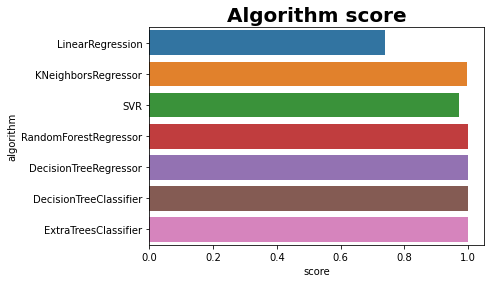

In [18]:
sns.barplot(x = df1['score'],y = df1['algorithm'])
plt.title("Algorithm score", fontsize=20, fontweight="bold");

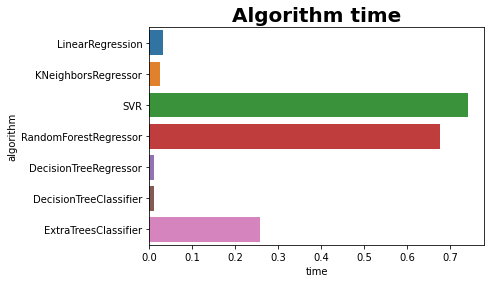

In [19]:
sns.barplot(x =df1['time'],y = df1['algorithm'])
plt.title("Algorithm time", fontsize=20, fontweight="bold");